# Problem description

You are to predict whether a company will go bankrupt in the following year, based on financial attributes of the company.

Perhaps you are contemplating lending money to a company, and need to know whether the company
is in near-term danger of not being able to repay.


## Goal

## Learning objectives

- Demonstrate mastery on solving a classification problem and presenting
the entire Recipe for Machine Learning process in a notebook.
- We will make suggestions for ways to approach the problem
    - But there will be little explicit direction for this task.
- It is meant to be analogous to a pre-interview task that a potential employer might assign
to verify your skill

# Import modules

In [1]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline


# API for students

In [2]:
## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

# Get the data

The first step in our Recipe is Get the Data.

- Each example is a row of data corresponding to a single company
- There are 64 attributes, described in the section below
- The column `Bankrupt` is 1 if the company subsequently went bankrupt; 0 if it did not go bankrupt
- The column `Id` is a Company Identifier

In [3]:
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4818, 66)


## Have a look at the data

We will not go through all steps in the Recipe, nor in depth.

But here's a peek

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


Pretty *unhelpful* !

What are these mysteriously named features ?

## Description of attributes

This may still be somewhat unhelpful for those of you not used to reading Financial Statements.

But that's partially the point of the exercise
- You can *still* perform Machine Learning *even if* you are not an expert in the problem domain
    - That's what makes this a good interview exercise: you can demonstrate your thought process even if you don't know the exact meaning of the terms
- Of course: becoming an expert in the domain *will improve* your ability to create better models
    - Feature engineering is easier if you understand the features, their inter-relationships, and the relationship to the target

Let's get a feel for the data
- What is the type of each attribute ?


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4818 non-null   object 
 1   X2        4818 non-null   object 
 2   X3        4818 non-null   object 
 3   X4        4818 non-null   object 
 4   X5        4818 non-null   object 
 5   X6        4818 non-null   object 
 6   X7        4818 non-null   object 
 7   X8        4818 non-null   object 
 8   X9        4818 non-null   float64
 9   X10       4818 non-null   object 
 10  X11       4818 non-null   object 
 11  X12       4818 non-null   object 
 12  X13       4818 non-null   float64
 13  X14       4818 non-null   object 
 14  X15       4818 non-null   object 
 15  X16       4818 non-null   object 
 16  X17       4818 non-null   object 
 17  X18       4818 non-null   object 
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4818 non-null   obje

You may be puzzled:
- Most attributes are `object` and *not* numeric (`float64`)
- But looking at the data via `data.head()` certainly gives the impression that all attributes are numeric

Welcome to the world of messy data !  The dataset has represented numbers as strings.
- These little unexpected challenges are common in the real-word
- Data is rarely perfect and clean

So you might want to first convert all attributes to numeric

**Hint**
- Look up the Pandas method `to_numeric`
    - We suggest you use the option `errors='coerce'`
    

In [6]:
data = data.apply(pd.to_numeric, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4816 non-null   float64
 1   X2        4816 non-null   float64
 2   X3        4816 non-null   float64
 3   X4        4803 non-null   float64
 4   X5        4808 non-null   float64
 5   X6        4816 non-null   float64
 6   X7        4816 non-null   float64
 7   X8        4804 non-null   float64
 8   X9        4818 non-null   float64
 9   X10       4816 non-null   float64
 10  X11       4816 non-null   float64
 11  X12       4803 non-null   float64
 12  X13       4818 non-null   float64
 13  X14       4816 non-null   float64
 14  X15       4812 non-null   float64
 15  X16       4804 non-null   float64
 16  X17       4804 non-null   float64
 17  X18       4816 non-null   float64
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4744 non-null   floa

<font color="blue" size="4">​ Feature X37 has too many missing values (almost half of the column), so I discarded it.

In [7]:
for col in data.columns:
    if data[col].notna().sum()<4000:
        print(col,data[col].notna().sum())

X37 2750


In [8]:
data.drop('X37',axis=1,inplace=True)

<font color="blue" size="4"> X_train contains all the 'X' features except X37, and company Id is not used in the model because it is not related to probability of going bankrupt.

In [9]:
cols = list(data.columns)
cols.remove('Bankrupt')
cols.remove('Id')

<font color="blue" size="4"> Use KNN Imputer to fill all the missing values in X_train. KNN finds the nearest neighbors of a data point, which are companies with similar financial conditions, so they are more likely to be of the same class.

In [10]:
from sklearn.impute import KNNImputer

X_train = data[cols]
imputer = KNNImputer()
X_train = imputer.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=cols)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      4818 non-null   float64
 1   X2      4818 non-null   float64
 2   X3      4818 non-null   float64
 3   X4      4818 non-null   float64
 4   X5      4818 non-null   float64
 5   X6      4818 non-null   float64
 6   X7      4818 non-null   float64
 7   X8      4818 non-null   float64
 8   X9      4818 non-null   float64
 9   X10     4818 non-null   float64
 10  X11     4818 non-null   float64
 11  X12     4818 non-null   float64
 12  X13     4818 non-null   float64
 13  X14     4818 non-null   float64
 14  X15     4818 non-null   float64
 15  X16     4818 non-null   float64
 16  X17     4818 non-null   float64
 17  X18     4818 non-null   float64
 18  X19     4818 non-null   float64
 19  X20     4818 non-null   float64
 20  X21     4818 non-null   float64
 21  X22     4818 non-null   float64
 22  

<font color="blue" size="4"> Plot the correlation matrix of X_train features in the form of a heat map. Many features are highly correlated with each other.

<Figure size 1200x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Feature Correlation Heatmap')

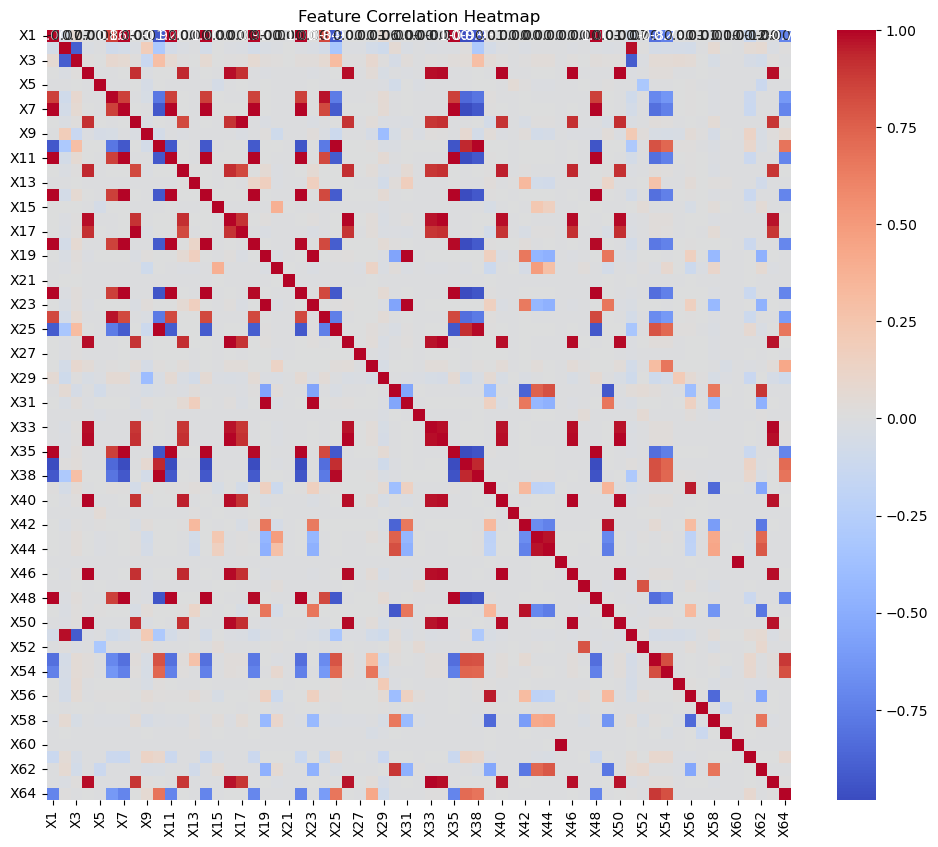

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X_train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

<font color="blue" size="4"> Highly correlated features may be redundant. Removing some of them may improve model performance by reducing overfitting on these features (as highly correlated features basically describe the same thing about the company's financial condition), and it may also reduce computation cost of the model. I will experiment with this later. We can use a simple for loop here to identify pairs of highly correlated features and drop one of them for each pair.

In [12]:
threshold = 0.95
cols_to_drop = set()

for i in range(len(cols)):
    col1 = cols[i]
    if col1 in cols_to_drop:
        continue
    for j in range(i+1, len(cols)):
        col2 = cols[j]
        if col2 in cols_to_drop:
            continue
        corr_value = X_train[col1].corr(X_train[col2])
        if abs(corr_value) > threshold:
            cols_to_drop.add(col2)
redundant = list(cols_to_drop)           
print("Dropped columns:", redundant)

Dropped columns: ['X22', 'X40', 'X35', 'X7', 'X18', 'X11', 'X38', 'X25', 'X49', 'X36', 'X26', 'X31', 'X60', 'X23', 'X14', 'X51', 'X17', 'X48', 'X34', 'X46', 'X56', 'X44', 'X50', 'X63', 'X24', 'X33', 'X16']


<font color="blue" size="4"> Note that unless specifically indicated, otherwise the X_train I used in the following training modules is still the original one with the full set of features.

<font color="blue" size="4"> Standardize X_train by removing the mean and dividing by the standard deviation of each column, so all columns are on similar scales.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=cols)

In [14]:
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
0,0.012016,-0.095994,-0.103874,-0.038702,-0.006132,0.062188,0.010119,-0.041924,-0.308567,0.003410,...,-0.085603,0.113242,0.003610,-0.108583,-0.023625,-0.015223,-0.085663,-0.005784,-0.062866,-0.063752
1,0.004670,-0.268618,0.247639,-0.007971,0.000100,0.016518,0.002210,-0.019810,-0.444998,0.065451,...,0.339007,-0.098772,-0.007444,0.063191,-0.032174,-0.015221,-0.077805,-0.066265,0.039579,-0.054938
2,0.012776,-0.072403,0.004237,-0.034662,0.000676,0.045266,0.012184,-0.045170,-0.392286,-0.027054,...,-0.050400,-0.008166,0.007507,-0.010217,-0.003197,-0.015087,-0.189007,-0.031922,-0.051686,-0.061521
3,0.016027,-0.396458,0.276618,0.056376,0.017573,0.026559,0.015002,0.045984,-0.410683,0.026661,...,0.228298,-0.038299,0.008637,0.014195,-0.043070,-0.015218,-0.084347,-0.056477,-0.016291,-0.064221
4,0.008373,-0.029943,-0.052220,-0.037273,-0.003823,0.009006,0.006479,-0.044008,-0.213899,-0.000263,...,-0.114672,-0.100887,-0.002892,0.042544,-0.039956,-0.015254,-0.059123,-0.027600,-0.054338,-0.061339


In [15]:
X_train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
count,4.818000e+03,4.818000e+03,4.818000e+03,4.818000e+03,4.818000e+03,4.818000e+03,4.818000e+03,4818.000000,4.818000e+03,4.818000e+03,...,4.818000e+03,4.818000e+03,4.818000e+03,4.818000e+03,4.818000e+03,4.818000e+03,4.818000e+03,4.818000e+03,4.818000e+03,4.818000e+03
mean,2.949534e-18,-2.064674e-17,-8.848602e-18,-1.474767e-18,-5.714722e-18,-1.474767e-18,-2.949534e-18,0.000000,-6.857667e-17,-9.585985e-18,...,4.424301e-18,1.474767e-18,-7.373835e-19,-3.097011e-17,4.792993e-18,-5.899068e-18,-8.111218e-18,-1.474767e-18,8.848602e-18,8.848602e-18
std,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104,1.000104e+00,1.000104e+00,...,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00
min,-6.917474e+01,-4.433294e-01,-5.624420e+01,-5.029286e-02,-4.519415e+01,-5.964685e+01,-6.917025e+01,-0.087414,-1.176155e+00,-1.779646e+01,...,-1.363187e+01,-6.201367e+01,-6.467613e+01,-1.121389e+00,-2.923525e+01,-1.548339e-02,-2.545883e-01,-7.786630e-02,-8.251659e-02,-7.242232e-02
25%,8.830577e-03,-2.316240e-01,-1.130756e-01,-3.929113e-02,-2.626752e-03,9.006168e-03,7.221564e-03,-0.048848,-4.198449e-01,-4.572283e-02,...,-1.284734e-01,-5.908346e-02,-1.014332e-03,-8.864366e-02,-4.307025e-02,-1.522581e-02,-1.570794e-01,-5.809608e-02,-5.530449e-02,-6.238625e-02
50%,1.515971e-02,-6.798705e-02,2.211627e-02,-3.385856e-02,-8.073092e-04,9.006168e-03,1.478720e-02,-0.042703,-3.268153e-01,4.583595e-03,...,-1.075678e-01,-3.237665e-03,1.187396e-02,-9.395985e-03,-4.206577e-02,-1.517005e-02,-1.132391e-01,-4.545558e-02,-3.886003e-02,-5.887113e-02
75%,2.563364e-02,1.072814e-01,1.790783e-01,-2.090499e-02,1.278090e-03,2.320191e-02,2.661741e-02,-0.027531,1.748667e-01,5.392411e-02,...,-3.565112e-02,8.991632e-02,3.001791e-02,3.300584e-02,-1.045946e-02,-1.504019e-02,-4.271037e-02,-2.583792e-02,-1.095572e-02,-4.975898e-02
max,3.590389e-01,5.977510e+01,2.190832e+01,6.832365e+01,5.248540e+01,2.613392e+01,3.571101e-01,62.754368,2.698359e+01,6.588367e+01,...,5.071884e+01,1.249552e+00,1.213756e+01,5.022729e+01,4.858689e+01,6.940142e+01,2.923236e+01,5.583408e+01,6.751414e+01,4.961960e+01


<font color="blue" size="4"> X_train_dropped is the training set without (probably) redundant features

In [16]:
non_redundant = [col for col in cols if col not in cols_to_drop]
X_train_dropped = X_train[non_redundant]
X_train_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      4818 non-null   float64
 1   X2      4818 non-null   float64
 2   X3      4818 non-null   float64
 3   X4      4818 non-null   float64
 4   X5      4818 non-null   float64
 5   X6      4818 non-null   float64
 6   X8      4818 non-null   float64
 7   X9      4818 non-null   float64
 8   X10     4818 non-null   float64
 9   X12     4818 non-null   float64
 10  X13     4818 non-null   float64
 11  X15     4818 non-null   float64
 12  X19     4818 non-null   float64
 13  X20     4818 non-null   float64
 14  X21     4818 non-null   float64
 15  X27     4818 non-null   float64
 16  X28     4818 non-null   float64
 17  X29     4818 non-null   float64
 18  X30     4818 non-null   float64
 19  X32     4818 non-null   float64
 20  X39     4818 non-null   float64
 21  X41     4818 non-null   float64
 22  

# Evaluating your project

We will evaluate your submission on a test dataset that we provide
- It has no labels, so **you** can't use it to evaluate your model, but **we** have the labels
- We will call this evaluation dataset the "holdout" data

Let's get it

In [17]:
holdout_data = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )

print("Data shape: ", holdout_data.shape)
holdout_data.head()

Data shape:  (1092, 65)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Id
0,0.20839,0.26185,0.41039,2.5692,69.704,0,0.20839,2.819,1.641,0.73815,...,0.193390,0.28231,0.81043,0,52.04,4.6463,58.171,6.2747,5.0017,699
1,-0.19877,0.9368,-0.15579,0.83309,-57.414,0,-0.19877,0.067309,0.93406,0.063054,...,-0.159470,-3.1524,1.20510,0,56.348,1.3163,364.730,1.0007,4.202,539
2,0.35741,0.57153,0.34081,1.5991,4.4819,0,0.35741,0.74968,2.6993,0.42847,...,0.160800,0.83415,0.86775,0,8.6285,7.8131,76.926,4.7448,29.896,867
3,0.024312,0.45219,0.011469,1.0393,-831.06,0.006914,0.031273,1.2114,0.88188,0.54781,...,0.193770,0.044381,0.82091,0.29244,21.306,3.4388,120.850,3.0202,1.2661,595
4,0.075494,0.088948,0.56492,7.6065,74.299,0,0.10304,10.243,2.1253,0.91105,...,0.037832,0.082864,0.95227,0,15.437,8.391,14.685,24.855,6.0797,632


We will evaluate your model on the holdout examples using metrics
- Accuracy
- Recall
- Precision

From our lecture: we may have to make a trade-off between Recall and Precision.

Our evaluation of your submission will be partially based on how you made (and described) the trade-off.

You may assume that it is 5 times worse to *fail to identify a company that will go bankrupt*
than it is to fail to identify a company that won't go bankrupt.

<font color="blue" size="4"> The instruction means that false negative is 5 times worse than false positive. We should emphasize improving the true positive rate by increasing recall (True Positives / (True Positives + False Negatives)) over increasing precision, although an optimal model should do well in all three aspects (accuracy, precision, and recall).

# Your model

Time for you to continue the Recipe for Machine Learning on your own.



In [18]:
y_train = data['Bankrupt']

<font color="blue" size="4"> Here I trained a logistic regression model to predict bankruptcy using GridSearchCV. For hyperparameters, different values of C (which is inversely proportional to regularization power) and penalty terms (L1 vs L2) are tried. There are two GridSearch instances performed：the first looks for the hyperparameter set that has the highest accuracy score in cross validation (calculated as the average for all 5 folds) and the second looks for another set that has the highest recall score in cross validation. An optimal hyperparameter set will have both high accuracy and high recall.

<font color="blue" size="5"> For this cell and the cells that follow, I commented out the model training process and only printed the results.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


# lr = LogisticRegression(max_iter=1000, random_state=42)


# param_grid = {
#     'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
#      'penalty': ['l1', 'l2'],
#     'solver': ['liblinear']  
# }

#  ###############################################################################
#  # 1) Grid Search for Accuracy
#  ###############################################################################
# grid_search_acc = GridSearchCV(
#      estimator=lr,
#      param_grid=param_grid,
#     scoring='accuracy',   
#     cv=5,
#     n_jobs=-1
#  )
# grid_search_acc.fit(X_train, y_train)

# print("=== Best for Accuracy ===")
# print("Best hyperparams:", grid_search_acc.best_params_)
# print("Best CV accuracy:", grid_search_acc.best_score_)

# ###############################################################################
# # 2) Grid Search for Recall
# ###############################################################################
# grid_search_rec = GridSearchCV(
#     estimator=lr,
#     param_grid=param_grid,
#     scoring='recall',    
#     cv=5,
#     n_jobs=-1
# )
# grid_search_rec.fit(X_train, y_train)

# print("\n=== Best for Recall ===")
# print("Best hyperparams:", grid_search_rec.best_params_)
# print("Best CV recall:", grid_search_rec.best_score_)
print("=== Best for Accuracy ===")
print("Best hyperparams: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}")
print("Best CV accuracy: 0.9360733013620127")

print("\n=== Best for Recall ===")
print("Best hyperparams: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}")
print("Best CV recall: 0.11692226335272342")

=== Best for Accuracy ===
Best hyperparams: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV accuracy: 0.9360733013620127

=== Best for Recall ===
Best hyperparams: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV recall: 0.11692226335272342


<font color="blue" size="4"> It can be seen that the two approaches lead to very different C values. The highest accuracy score is 0.94 which seems decent, but the highest recall that can be achieved is only 0.1, so only 1 in 10 comapnies that will go bankrupt is correctly identified, which is very bad. 

In [20]:
data['Bankrupt'].sum()/len(data['Bankrupt'])

0.0639269406392694

<font color="blue" size="4"> A closer look at the labels reveal that the two classes are very imbalanced: only about 6 percent of the companies in the training data actually go bankrupt, so the model may fail to learn the characteristics of companies that go bankrupt and predict all of them as negative (not bankrupt), which leads to high accuracy and low recall.

<font color="blue" size="4"> We can use SMOTE to create artificial samples for the minority class (statistically inferred from existing samples) to make sure the number of samples for the two classes are the same, thus the model can equally learn about the nature of the positive and negative classes.

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<font color="blue" size="4"> Since now we have the same number of bankrupt and non-bankrupt companies, the three metrics: accuracy, recall, and precision are better aligned together. For example, a low recall is going to lead to low accuracy because half of the training set is now positive(bankrupt).

In [22]:
#grid_search_acc.fit(X_train_resampled, y_train_resampled)

print("=== Best for Accuracy ===")
print("Best hyperparams: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}")
print("Best CV accuracy: 0.7958980044345898")

=== Best for Accuracy ===
Best hyperparams: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV accuracy: 0.7958980044345898


In [23]:
#grid_search_rec.fit(X_train_resampled, y_train_resampled)

print("\n=== Best for Recall ===")
print("Best hyperparams: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}")
print("Best CV recall: 0.7731707317073171")


=== Best for Recall ===
Best hyperparams: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV recall: 0.7731707317073171


<font color="blue" size="4"> I used SMOTE augmented data to re-train the logistic regression model and the same set of hyperparameters achieved both highest accuracy and highest recall. Note that the two scores are close to each other:0.80 and 0.77, supporting the statement I made above. From now on, I would use accuracy as the only metric.

<font color="blue" size="5"> Logistic regression is only a benchmark. Tree based models are likely to outperform it, so below I tried RandomForest and Xgboost, using RandomizedSearchCV with accuracy score as the criterion. RandomizedSearchCV enables us to randomly select hyperparameter values from a given range and distribution, like uniform distribution. The total number of hyperparameter sets tried is specified by the user. I still used SMOTE augmented data to train.

In [24]:
from sklearn.ensemble import RandomForestClassifier

#rf = RandomForestClassifier(random_state=42)

# param_dist = {
#     'n_estimators': randint(50, 300),       
#     'max_depth': randint(10, 30),            
#     'min_samples_split': randint(2, 10),    
#     'min_samples_leaf': randint(1, 10),     
#     'max_features': uniform(0.4, 0.6),
#     'max_samples': uniform(0.6,0.4)
# }

# rand_search_rf = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=100,             
#     scoring='accuracy',    
#     cv=5,                  
#     random_state=42,       
#     n_jobs=-1              
# )

# rand_search_rf.fit(X_train_resampled, y_train_resampled)

# print("Best hyperparameters:", rand_search_rf.best_params_)
# print("Best CV score:", rand_search_rf.best_score_)

print("Best hyperparameters: {'max_depth': 22, 'max_features': 0.4845545349848576, 'max_samples': 0.9208787923016158, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}")
print("Best CV score: 0.9648558758314856")

Best hyperparameters: {'max_depth': 22, 'max_features': 0.4845545349848576, 'max_samples': 0.9208787923016158, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}
Best CV score: 0.9648558758314856


<font color="blue" size="4"> Features like number of trees, tree max depth and proportion of total features considered for each split can prevent trees from becoming too complicated and overfitting on data. The highest cross validation accuracy score is 0.96 for RandomForest.

<font color="blue" size="4"> Xgboost has some similar hyperparameters like RandomForest due to tree-based nature, but since it's boosting we can choose different learning rates. Xgboost also comes with built-in regularization effects (L1 & L2). The highest cross validated accuracy score is 0.98 for Xgboost.

<font color="red" size="5"> The RandomizedSearch below yielded the final Xgboost model I used in MyModel() for grading. 

In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# xgb = XGBClassifier(eval_metric='logloss',random_state=42)

# param_dist = {
#     'n_estimators': randint(50, 300),      
#     'max_depth': randint(3, 15),            
#     'learning_rate': uniform(0.01, 0.19),     
#     'subsample': uniform(0.6, 0.4),           
#     'colsample_bytree': uniform(0.6, 0.4)
# }

# rand_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_dist,
#     n_iter=100,           
#     scoring='accuracy',  
#     cv=5,
#     random_state=42,
#     refit=True,
#     n_jobs=-1
# )

# rand_search.fit(X_train_resampled, y_train_resampled)

# print("Best hyperparameters:", rand_search.best_params_)
# print("Best CV score:", rand_search.best_score_)

print("Best hyperparameters: {'colsample_bytree': 0.8916028672163949, 'learning_rate': 0.1565413658703297, 'max_depth': 7, 'n_estimators': 283, 'subsample': 0.7433862914177091}")
print("Best CV score: 0.982039911308204")

Best hyperparameters: {'colsample_bytree': 0.8916028672163949, 'learning_rate': 0.1565413658703297, 'max_depth': 7, 'n_estimators': 283, 'subsample': 0.7433862914177091}
Best CV score: 0.982039911308204


<font color="blue" size="4"> The Xgboost model can achieve 100% accuracy for in-sample training data from the original dataset (not generated by SMOTE) 

In [26]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
#accuracy_score(y_train, rand_search.best_estimator_.predict(X_train))
print(1.0)

1.0


<font color="blue" size="4"> As I mentioned previously, some features are highly correlated. Here I experimented with the training set X_train_dropped that only kept features with abs(correlation)<0.95, also augmented by SMOTE. 

In [27]:
dropped_smote = SMOTE(random_state=42)
X_train_dropped_resampled, y_train_dropped_resampled = smote.fit_resample(X_train_dropped, y_train)

In [28]:
# xgb_dropped = XGBClassifier(eval_metric='logloss',random_state=42)

# param_dist = {
#     'n_estimators': randint(50, 300),      
#     'max_depth': randint(3, 15),            
#     'learning_rate': uniform(0.01, 0.19),     
#     'subsample': uniform(0.6, 0.4),           
#     'colsample_bytree': uniform(0.6, 0.4)
# }

# rand_search_dropped = RandomizedSearchCV(
#     estimator=xgb_dropped,
#     param_distributions=param_dist,
#     n_iter=100,           
#     scoring='accuracy',  
#     cv=5,
#     random_state=42,
#     refit=True,
#     n_jobs=-1
# )

# rand_search_dropped.fit(X_train_dropped_resampled, y_train_dropped_resampled)

# print("Best hyperparameters:", rand_search_dropped.best_params_)
# print("Best CV score:", rand_search_dropped.best_score_)

print("Best hyperparameters: {'colsample_bytree': 0.8916028672163949, 'learning_rate': 0.1565413658703297, 'max_depth': 7, 'n_estimators': 283, 'subsample': 0.7433862914177091}")
print("Best CV score: 0.9742793791574279")

Best hyperparameters: {'colsample_bytree': 0.8916028672163949, 'learning_rate': 0.1565413658703297, 'max_depth': 7, 'n_estimators': 283, 'subsample': 0.7433862914177091}
Best CV score: 0.9742793791574279


<font color="blue" size="4"> Highest accuracy achieved is 0.97, very close to the last model, so it could be reasoned that dropping these features would not really hurt model performance. Due to time limit I would not go further, but we could experiment with different correlation threshold in the future.

## Submission guidelines

Although your notebook may contain many models (e.g., due to your iterative development)
we will only evaluate a single model.

So choose one (explain why !) and obey the following guidelines.

The objective of creating the guideline is to simplify the evaluation of your model.

We have specified this by requiring you to implement a function called `MyModel`
- which takes an unlabeled holdout dataset (one example per row)
- and returns an array of predictions (one per holdout example)

We will evaluate your model by passing a holdout dataset into your implemention of `MyModel`

- obtaining predictions
- evaluating the predictions against metrics such as Accuracy and Recall











To be specific:

You will implement the body of a subroutine `MyModel`

The subroutine
- takes as argument a Pandas DataFrame 
    - Each row is an example on which to predict
    - The features of the example are elements of the row
- Performs predictions on each example
- Returns an array of predictions with a one-to-one correspondence with the examples in the test set

Here is what `MyModel` should look like:


    def MyModel(data, other={}):
        """
        Parameters
        -----------
        data: a Pandas DataFrame
        other: a dict
            You can use this to pass any other arguments you find are necessary
            
        Returns
        -------
        pred: an array of predicted values
            The number of elements (i.e., predictions) is equal to the number of examples in the 'data' parameter
                i.e., one prediction per example
        """
        
        # The function should create an array of predictions; we initialize it to the empty array for convenience
        pred = []
   
        # YOUR CODE HERE
        
        return pred

Your code should follow the comment `# YOUR CODE HERE`

<font color="blue" size="4"> If not already done so, re-run the whole notebook when grading so this cell can work properly.

In [29]:
def MyModel(data, other={}):
    data1 = data[cols]
    data1 = data1.apply(pd.to_numeric, errors='coerce')
    data1 = imputer.fit_transform(data1)
    data_standardized = scaler.fit_transform(data1)
    model = XGBClassifier(eval_metric='logloss', colsample_bytree = 0.8916028672163949, learning_rate = 0.1565413658703297, max_depth = 7, n_estimators = 283, subsample = 0.7433862914177091, random_state=42)
    model.fit(X_train_resampled,y_train_resampled)
    pred = model.predict(data_standardized)
    return pred

In [30]:
y_hold_pred = MyModel(holdout_data)
len(y_hold_pred)

1092

We will evaluate your model against the holdout data
- By reading the holdout examples `X_hold` (as above)
- Calling `y_hold_pred = MyModel(X_hold, other)` to get the predictions
- Comparing the predicted values `y_hold_pred` against the true labels `y_hold` which are known only to the instructors

See the following cell as an illustration

**Remember**

The holdout data is in the same format as the one we used for training
- Except that it has no attribute for the target
- So you will need to perform all the transformations on the holdout data
    - As you did on the training data
    - Including turning the string representation of numbers into actual numeric data types

All of this work *must* be performed within the body of the `MyModel` routine you will write

We will grade you by comparing the predictions array you create to the answers known to us.

# Check your work: predict and evaluate metrics on *your* test examples

Although only the instructors have the correct labels for the holdout dataset, you may want
to create your own test dataset on which to evaluate your out of sample metrics.

If you choose to do so, you can evaluate your models using the same metrics that the instructors will use.

- Test whether your implementation of `MyModel` works
- See the metrics  your model produces

In [31]:
# name = "Choose a descriptive name for your model"
# y_test_pred = MyModel(X_test, other)

# accuracy_test = accuracy_score(y_test, y_test_pred)
# recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
# precision_test = precision_score(y_test,   y_test_pred, pos_label=1, average="binary")

# print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
#                                                                             a=accuracy_test,
#                                                                             r=recall_test,
#                                                                             p=precision_test
#                                                                             )
#          )